<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mahdi Tabatabaei

**Student ID**: 400101515


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

# Soft-Margin SVM: Primal and Dual Formulation

The primal formulation for the Soft-Margin SVM for linearly separable data with slack variables \(\xi_i \ge 0\) is given by:

\begin{aligned}
& \text{minimize} \quad & & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{subject to} \quad & & y_i (w^T x_i + b) \geq 1 - \xi_i, \quad i = 1, \ldots, N \\
& & & \xi_i \geq 0, \quad i = 1, \ldots, N
\end{aligned}

where \(w\) represents the weight vector, \(b\) is the bias term, and \(C\) is the regularization parameter controlling the trade-off between a wide margin and misclassification.

## 1. Derive the Dual Optimization Problem

Starting from the primal problem, we introduce Lagrange multipliers:
- \begin{aligned}(\alpha_i \geq 0) \quad \text{for the constraint} \quad (y_i (w^T x_i + b) \geq 1 - \xi_i) \end{aligned}
- \begin{aligned}(\mu_i \geq 0) \quad \text{for the constraint} \quad (\xi_i \geq 0)\end{aligned}

The Lagrangian \(L(w, b, \xi, \alpha, \mu)\) is given by:

\begin{aligned}
L(w, b, \xi, \alpha, \mu) = & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i [y_i (w^T x_i + b) - 1 + \xi_i] - \sum_{i=1}^{N} \mu_i \xi_i \\
= & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i y_i (w^T x_i + b) + \sum_{i=1}^{N} \alpha_i (1 - \xi_i) - \sum_{i=1}^{N} \mu_i \xi_i
\end{aligned}

To find the dual, we need to minimize \(L(w, b, \xi, \alpha, \mu)\) with respect to \(w\), \(b\), and \(\xi_i\).

1. **Minimizing with respect to \(w\):**

  \begin{aligned}
\frac{\partial L}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0 \implies w = \sum_{i=1}^{N} \alpha_i y_i x_i
\end{aligned}

2. **Minimizing with respect to \(b\):**

\begin{aligned}
\frac{\partial L}{\partial b} = - \sum_{i=1}^{N} \alpha_i y_i = 0 \implies \sum_{i=1}^{N} \alpha_i y_i = 0
\end{aligned}

3. **Minimizing with respect to $(\xi_i)$:**

\begin{aligned}
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \implies \alpha_i + \mu_i = C
\end{aligned}

Since $(\mu_i \geq 0)$, it follows that $(0 \leq \alpha_i \leq C)$.

Substitute $(w = \sum_{i=1}^{N} \alpha_i y_i x_i)$ back into the Lagrangian:


\begin{aligned}
L(w, b, \xi, \alpha, \mu) = & \frac{1}{2} \left( \sum_{i=1}^{N} \alpha_i y_i x_i \right)^T \left( \sum_{i=1}^{N} \alpha_i y_i x_i \right) + C \sum_{i=1}^{N} \xi_i \\
& - \sum_{i=1}^{N} \alpha_i y_i \left( \sum_{j=1}^{N} \alpha_j y_j x_j \right)^T x_i + \sum_{i=1}^{N} \alpha_i (1 - \xi_i) - \sum_{i=1}^{N} \mu_i \xi_i
\end{aligned}


This simplifies to:

\begin{aligned}
L = & \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_{i=1}^{N} \alpha_i + \sum_{i=1}^{N} \alpha_i \\
= & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j
\end{aligned}

Thus, the dual problem is:

\begin{aligned}
& \text{maximize} \quad & & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
& \text{subject to} \quad & & \sum_{i=1}^{N} \alpha_i y_i = 0 \\
& & & 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N
\end{aligned}

## 2. Calculate the Weights and Bias \(w\) and \(b\) Using the Dual Problem Optimum Points

Once we have the optimal $(\alpha_i^*)$, the weights \(w\) can be calculated as:

$$w = \sum_{i=1}^{N} \alpha_i^* y_i x_i$$

To calculate \(b\), we use the KKT conditions. For support vectors (where $(0 < \alpha_i < C)$):


$$y_i (w^T x_i + b) = 1 - \xi_i \quad \Rightarrow \quad y_i (w^T x_i + b) = 1 \quad (\text{since} \ \xi_i = 0 \ \text{for support vectors})$$


Hence,

$$b = y_i - w^T x_i$$

## 3. Classify New Data Points Using the Optimal Weights and Bias

To classify a new data point \(x\), we compute the decision function:

$$f(x) = w^T x + b$$

The classification is then determined by the sign of \(f(x)\):

$$
\text{If } f(x) \geq 0, \text{ classify } x \text{ as } +1 \\
\text{If } f(x) < 0, \text{ classify } x \text{ as } -1
$$


Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

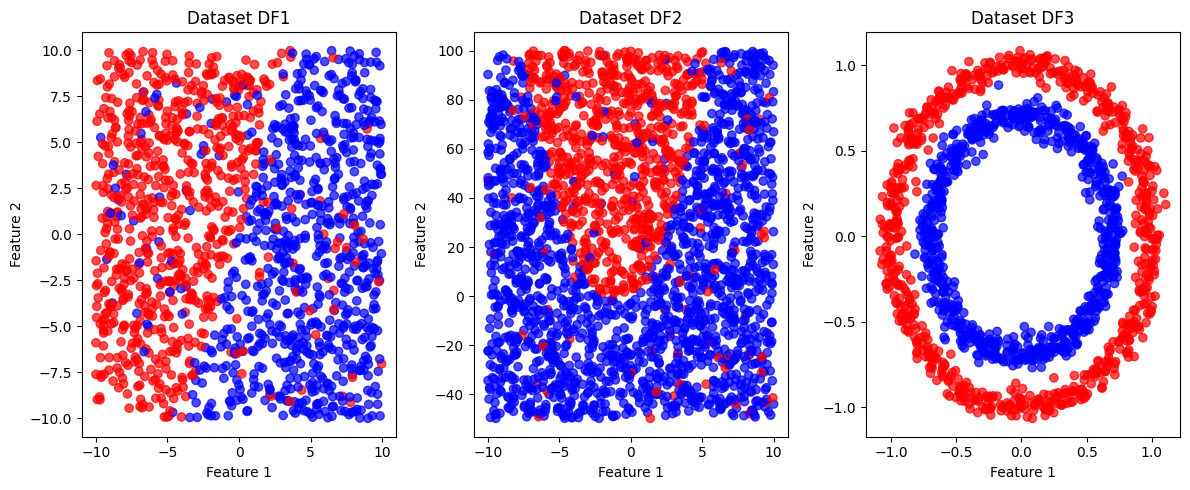

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
df1 = pd.read_csv('DF1.csv')
df2 = pd.read_csv('DF2.csv')
df3 = pd.read_csv('DF3.csv')

# Display the first 5 rows of each dataset
print("First 5 rows of DF1:")
print(df1.head())

print("\nFirst 5 rows of DF2:")
print(df2.head())

print("\nFirst 5 rows of DF3:")
print(df3.head())

# Extract features and labels
X1, y1 = df1.iloc[:, :-1].values, df1.iloc[:, -1].values
X2, y2 = df2.iloc[:, :-1].values, df2.iloc[:, -1].values
X3, y3 = df3.iloc[:, :-1].values, df3.iloc[:, -1].values

# Plot dataset DF1
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='bwr', alpha=0.7)
plt.title('Dataset DF1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot dataset DF2
plt.subplot(1, 3, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='bwr', alpha=0.7)
plt.title('Dataset DF2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot dataset DF3
plt.subplot(1, 3, 3)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='bwr', alpha=0.7)
plt.title('Dataset DF3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

***Based on the scatter plot, we use linear kernel for DF1, Polynomial Kernel for DF2, and RBF Kernel for DF3.***

Use the following function to visualize the datapoints for all datasets.

Visualizing Dataset DF1:


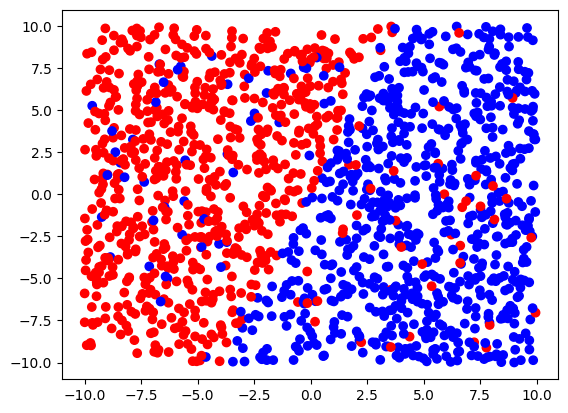

Visualizing Dataset DF2:


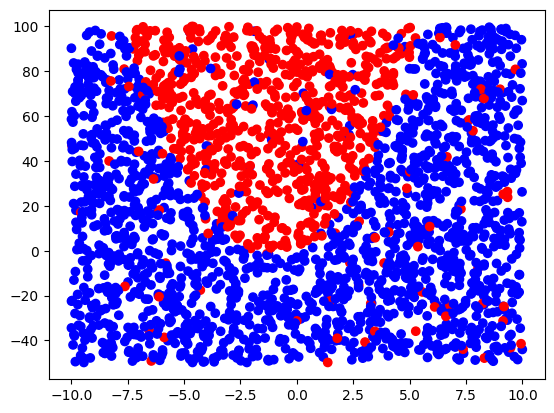

Visualizing Dataset DF3:


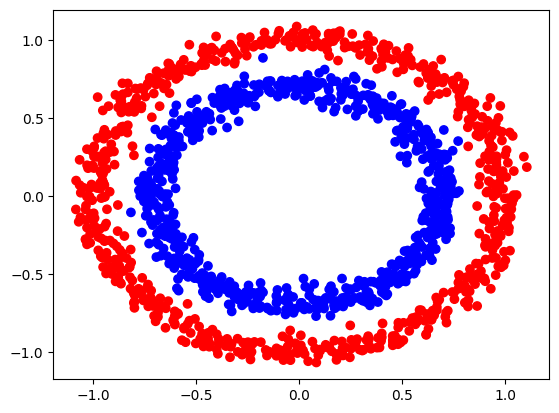

In [4]:
def visualize_data(X, y):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.show()

# Extract features and labels
X1, y1 = df1.iloc[:, :-1].values, df1.iloc[:, -1].values
X2, y2 = df2.iloc[:, :-1].values, df2.iloc[:, -1].values
X3, y3 = df3.iloc[:, :-1].values, df3.iloc[:, -1].values


# Visualize dataset DF1
print("Visualizing Dataset DF1:")
visualize_data(X1, y1)

# Visualize dataset DF2
print("Visualizing Dataset DF2:")
visualize_data(X2, y2)

print("Visualizing Dataset DF3:")
visualize_data(X3, y3)

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

Based on the scatter plot, we use linear kernel for DF1, Polynomial Kernel for DF2, and RBF Kernel for DF3.

**Dataset DF1**: It shows a clear linear separation, the linear kernel is appropriate.

Dataset DF2: It has a quadratic boundary, the polynomial kernel will be chosen.

Dataset DF3: It is not linearly separable and may have complex decision boundaries.

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [6]:
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets (80% train, 20% test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

Optimal alpha values:
[ 1.00000000e+00  1.79533789e-21 -1.76639814e-20 ...  1.00000000e+00
 -1.27234638e-20  9.34900255e-22]

Weight vector w:
[-2.11074883  0.57371611]

Bias term b:
-0.16219161655323946


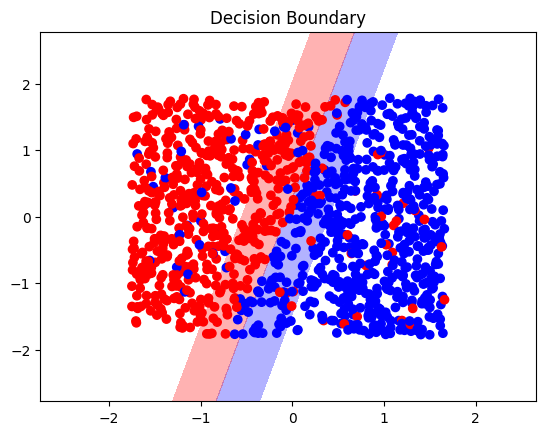

In [24]:
# Number of training samples
n_train = X1_train_scaled.shape[0]

# Define the dual problem variables
alpha = cp.Variable(n_train)

# Define the kernel (linear kernel in this case)
K = X1_train_scaled @ X1_train_scaled.T
Y = np.outer(y1_train, y1_train) * K

# Ensure Y is positive semidefinite (optional step, depends on your data)
Y = (Y + Y.T) / 2  # Making sure Y is symmetric
eigvals = np.linalg.eigvalsh(Y)
if np.any(eigvals < 0):
    Y += np.eye(n_train) * (-np.min(eigvals) + 1e-6)

# Define the objective function for the dual problem
objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, Y))

# Define the constraints for the dual problem
constraints = [alpha >= 0, alpha <= 1, cp.sum(cp.multiply(alpha, y1_train)) == 0]

# Set up the problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the optimal alpha
alpha_opt = alpha.value

# Calculate the weight vector w
w = np.sum((alpha_opt * y1_train)[:, np.newaxis] * X1_train_scaled, axis=0)

# Support vectors have alpha > 0 (within a small tolerance)
support_vectors = np.where(alpha_opt > 1e-5)[0]

# Calculate the bias term b
b = np.mean(y1_train[support_vectors] - X1_train_scaled[support_vectors] @ w)

# Print the results
print("Optimal alpha values:")
print(alpha_opt)

print("\nWeight vector w:")
print(w)

print("\nBias term b:")
print(b)

# Optional: Visualize the decision boundary (if applicable)
def visualize_decision_boundary(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title("Decision Boundary")
    plt.show()

visualize_decision_boundary(X1_train_scaled, y1_train, w, b)

Predict the class of each entry in the test set using your learned model.

In [25]:
# Predict the class labels for the test set
def predict(X, w, b):
    return np.sign(X @ w + b)

# Assuming X1_test_scaled is your test data
y1_test_pred = predict(X1_test_scaled, w, b)

# Print the predicted class labels
print("Predicted class labels for the test set:")
print(y1_test_pred)


Predicted class labels for the test set:
[-1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.
  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.
  1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.
  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.
 -1. -1. -

Use classification_report function (from sklearn) to get the accuracy of your model.

In [26]:
y1_test = y1_test.astype(int)

# Print the classification report
print("Classification report for the test set:")
print(classification_report(y1_test, y1_test_pred))

Classification report for the test set:
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92       148
           1       0.93      0.92      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [28]:
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets (80% train, 20% test)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

Classification report for the test set:
              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       336
           1       0.83      0.89      0.86       160

    accuracy                           0.90       496
   macro avg       0.89      0.90      0.89       496
weighted avg       0.91      0.90      0.90       496



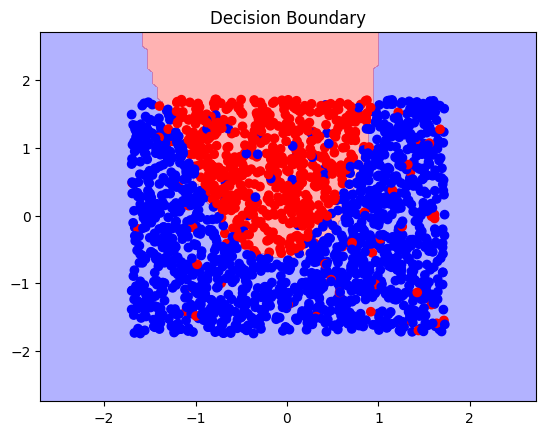

In [35]:
# Define the polynomial kernel function
def polynomial_kernel(X, degree=2):
    return (1 + X @ X.T) ** degree

# Number of training samples
n_train = X2_train_scaled.shape[0]

# Define the dual problem variables
alpha = cp.Variable(n_train)

# Compute the kernel matrix using the polynomial kernel
K = polynomial_kernel(X2_train_scaled, degree=2)
Y = np.outer(y2_train, y2_train) * K

# Ensure Y is positive semidefinite (optional step, depends on your data)
Y = (Y + Y.T) / 2  # Making sure Y is symmetric
eigvals = np.linalg.eigvalsh(Y)
if np.any(eigvals < 0):
    Y += np.eye(n_train) * (-np.min(eigvals) + 1e-6)

# Define the objective function for the dual problem
objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, Y))

# Define the constraints for the dual problem
constraints = [alpha >= 0, alpha <= 1, cp.sum(cp.multiply(alpha, y2_train)) == 0]

# Set up the problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the optimal alpha
alpha_opt = alpha.value

# Calculate the weight vector w
# This step is different for the kernel method, since we don't explicitly calculate w
# w is implicitly defined in terms of the support vectors
support_vectors = np.where(alpha_opt > 1e-5)[0]
b = np.mean(y2_train[support_vectors] - np.sum((alpha_opt[support_vectors] * y2_train[support_vectors])[:, np.newaxis] * K[support_vectors, :][:, support_vectors], axis=0))

# Function to predict the class labels for the test set using the kernel trick
def predict_kernel(X_train, X_test, alpha, y_train, b, degree=2):
    K_test = (1 + X_test @ X_train.T) ** degree
    return np.sign(np.sum((alpha * y_train) * K_test, axis=1) + b)

# Assuming X2_test_scaled is your test data and y2_test is the true labels
y2_test_pred = predict_kernel(X2_train_scaled, X2_test_scaled, alpha_opt, y2_train, b, degree=2)

# Ensure the predicted labels are of the same type as the true labels
y2_test_pred = y2_test_pred.astype(int)
y2_test = y2_test.astype(int)

# Print the classification report
print("Classification report for the test set:")
print(classification_report(y2_test, y2_test_pred))

# Optional: Visualize the decision boundary (if applicable)
def visualize_decision_boundary(X, y, alpha, y_train, b, degree=2):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_kernel(X, X_grid, alpha, y_train, b, degree)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title("Decision Boundary")
    plt.show()

visualize_decision_boundary(X2_train_scaled, y2_train, alpha_opt, y2_train, b, degree=2)

Predict the class of each entry in the test set using your learned model.

In [36]:
# Function to predict the class labels for the test set using the kernel trick
def predict_kernel(X_train, X_test, alpha, y_train, b, degree=2):
    K_test = (1 + X_test @ X_train.T) ** degree
    return np.sign(np.sum((alpha * y_train) * K_test, axis=1) + b)

# Assuming X2_test_scaled is your test data and y2_test is the true labels
y2_test_pred = predict_kernel(X2_train_scaled, X2_test_scaled, alpha_opt, y2_train, b, degree=2)

# Ensure the predicted labels are of the same type as the true labels
y2_test_pred = y2_test_pred.astype(int)

# Print the predicted class labels
print("Predicted class labels for the test set:")
print(y2_test_pred)

Predicted class labels for the test set:
[-1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1
  1 -1  1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1
 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1
 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1
 -1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1
 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 

Use classification_report function (from sklearn) to get the accuracy of your model.

In [37]:
y2_test = y2_test.astype(int)

# Print the classification report
print("Classification report for the test set:")
print(classification_report(y2_test, y2_test_pred))

Classification report for the test set:
              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       336
           1       0.83      0.89      0.86       160

    accuracy                           0.90       496
   macro avg       0.89      0.90      0.89       496
weighted avg       0.91      0.90      0.90       496



## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [40]:
# Split the dataset into training and testing sets (80% train, 20% test)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

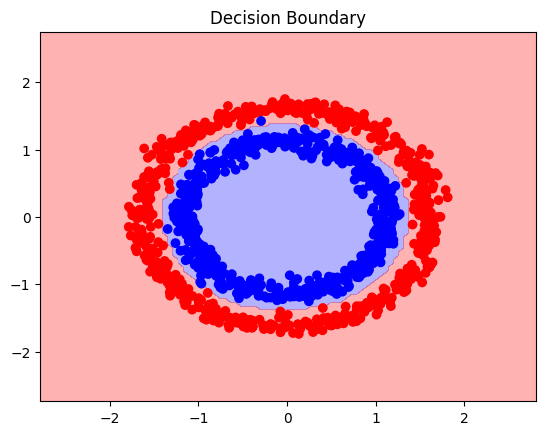

In [43]:
# Define the RBF kernel function
def rbf_kernel(X, gamma=1.0):
    sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * X @ X.T
    return np.exp(-gamma * sq_dists)

# Number of training samples
n_train = X3_train_scaled.shape[0]

# Define the dual problem variables
alpha = cp.Variable(n_train)

# Compute the kernel matrix using the RBF kernel
K = rbf_kernel(X3_train_scaled, gamma=1.0)
Y = np.outer(y3_train, y3_train) * K

# Ensure Y is positive semidefinite using cvxpy.psd_wrap
Y_psd = cp.psd_wrap(Y)

# Define the objective function for the dual problem
objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, Y_psd))

# Define the constraints for the dual problem
constraints = [alpha >= 0, alpha <= 1, cp.sum(cp.multiply(alpha, y3_train)) == 0]

# Set up the problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the optimal alpha
alpha_opt = alpha.value

# Calculate the weight vector w
# This step is different for the kernel method, since we don't explicitly calculate w
# w is implicitly defined in terms of the support vectors
support_vectors = np.where(alpha_opt > 1e-5)[0]
b = np.mean(y3_train[support_vectors] - np.sum((alpha_opt[support_vectors] * y3_train[support_vectors])[:, np.newaxis] * K[support_vectors, :][:, support_vectors], axis=0))

# Function to predict the class labels for the test set using the kernel trick
def predict_kernel(X_train, X_test, alpha, y_train, b, gamma=1.0):
    sq_dists = np.sum(X_test**2, axis=1).reshape(-1, 1) + np.sum(X_train**2, axis=1) - 2 * X_test @ X_train.T
    K_test = np.exp(-gamma * sq_dists)
    return np.sign(np.sum((alpha * y_train) * K_test, axis=1) + b)

# Assuming X3_test_scaled is your test data and y3_test is the true labels
y3_test_pred = predict_kernel(X3_train_scaled, X3_test_scaled, alpha_opt, y3_train, b, gamma=1.0)

# Ensure the predicted labels are of the same type as the true labels
y3_test_pred = y3_test_pred.astype(int)
y3_test = y3_test.astype(int)

# Optional: Visualize the decision boundary (if applicable)
def visualize_decision_boundary(X, y, alpha, y_train, b, gamma=1.0):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    sq_dists = np.sum(X_grid**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * X_grid @ X.T
    K_grid = np.exp(-gamma * sq_dists)
    Z = np.sign(np.sum((alpha * y_train) * K_grid, axis=1) + b)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title("Decision Boundary")
    plt.show()

visualize_decision_boundary(X3_train_scaled, y3_train, alpha_opt, y3_train, b, gamma=1.0)

Predict the class of each entry in the test set using your learned model.

In [46]:
# Function to predict the class labels for the test set using the kernel trick
def predict_kernel(X_train, X_test, alpha, y_train, b, gamma=1.0):
    sq_dists = np.sum(X_test**2, axis=1).reshape(-1, 1) + np.sum(X_train**2, axis=1) - 2 * X_test @ X_train.T
    K_test = np.exp(-gamma * sq_dists)
    return np.sign(np.sum((alpha * y_train) * K_test, axis=1) + b)

# Assuming X3_test_scaled is your test data and y3_test is the true labels
y3_test_pred = predict_kernel(X3_train_scaled, X3_test_scaled, alpha_opt, y3_train, b, gamma=1.0)

# Ensure the predicted labels are of the same type as the true labels
y3_test_pred = y3_test_pred.astype(int)

# Print the predicted class labels
print("Predicted class labels for the test set:")
print(y3_test_pred)

Predicted class labels for the test set:
[ 1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1
 -1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1
  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1
 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1
 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1
 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1  1
  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1  1
 -1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1
 -1  1  1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1  1  1
  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1
  1  1 -1  1]


Use classification_report function (from sklearn) to get the accuracy of your model.

In [47]:
y3_test = y3_test.astype(int)

# Print the classification report
print("Classification report for the test set:")
print(classification_report(y3_test, y3_test_pred))

Classification report for the test set:
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

